In [1]:
%matplotlib ipympl
import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
import numpy as np

(-30.0, 20.0)

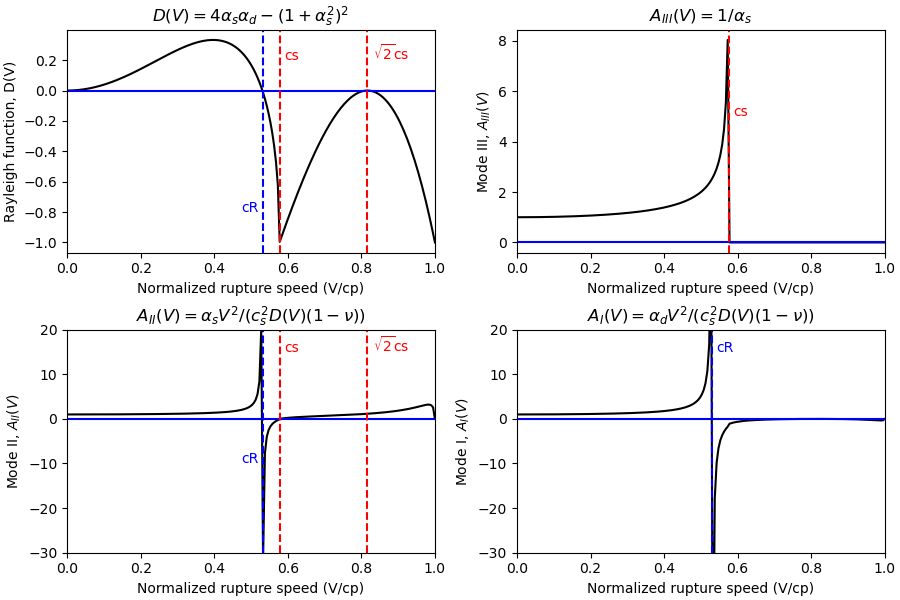

In [3]:
plt.close()
np.seterr(divide='ignore', invalid='ignore')


# Elastic properties
nu = 0.25                          # Poisson's ratio
cpcs = np.sqrt(2*(1-nu)/(1-2*nu))  # ratio of dilatational to shear wave speed

ndcs = 1/cpcs
sq2cs = ndcs * np.sqrt(2)
ndcr = 0.92*ndcs                   # Rayleigh speed for nu = 0.25

V = np.linspace(0,1,200)           # ratio of rupture speed to dilatational wave speed (v/cp)

def Rayleigh(V):
    vs = V*cpcs                                  # v/cs = v/cp * cp/cs
    als = np.sqrt((1-vs**2)*-1J**2)              # V = Vrupt / cs                     
    ald = np.sqrt((1-V**2)*-1J**2)
    Dv = 4*als*ald - (1+als*als)**2
    return Dv.real

def AI(V):
    vs = V*cpcs
    als = np.sqrt((1-vs**2)*-1J**2)              # V = Vrupt / cs                     
    ald = np.sqrt((1-V**2)*-1J**2)
    Dv = 4*als*ald - (1+als*als)**2
    AIv = ald*(vs*vs)/Dv/(1-nu)
    return AIv.real

def AII(V):
    vs = V*cpcs
    als = np.sqrt((1-vs**2)*-1J**2)              # V = Vrupt / cs                     
    ald = np.sqrt((1-V**2)*-1J**2)
    Dv = 4*als*ald - (1+als*als)**2
    AIIv = als*(vs*vs)/Dv/(1-nu)
    return AIIv.real

def AIII(V):
    vs = V*cpcs
    als = np.sqrt((1-vs**2)*-1J**2)              # V = Vrupt / cs                     
    AIIIv = 1/als
    return AIIIv.real
    

Dv = Rayleigh(V)
A1 = AI(V)
A2 = AII(V)
A3 = AIII(V)
    
fig = plt.figure(constrained_layout=True)
fig.set_size_inches(9,6)
gs=fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax1.plot(V,Dv,color="black")
ax1.plot(V,np.zeros(Dv.shape),color="blue")
ax1.axvline(ndcs,linestyle='dashed',color="red")
ax1.axvline(sq2cs,linestyle='dashed',color="red")
ax1.axvline(ndcr,linestyle='dashed',color="blue")
ax1.set_xlim([0, 1])
ax1.set_xlabel('Normalized rupture speed (V/cp)')
ax1.set_ylabel('Rayleigh function, D(V)')
ax1.text(0.89*ndcr,-0.8,'cR',color="blue")
ax1.text(1.02*ndcs,0.2,'cs',color="red")
ax1.text(1.02*sq2cs,0.2,'$\sqrt{2}$cs',color="red")
ax1.set_title('$D(V)=4 \\alpha_{s}\\alpha_{d}-(1+\\alpha_{s}^2)^2$')

ax2.plot(V,A3,color="black")
ax2.plot(V,np.zeros(Dv.shape),color="blue")
ax2.axvline(ndcs,linestyle='dashed',color="red")
ax2.set_xlim([0, 1])
ax2.set_xlabel('Normalized rupture speed (V/cp)')
ax2.set_ylabel('Mode III, $A_{III}(V)$')
ax2.text(1.02*ndcs,5,'cs',color="red")
ax2.set_title('$A_{III}(V)= 1 /\\alpha_{s}$')

ax3.plot(V,A2,color="black")
ax3.plot(V,np.zeros(Dv.shape),color="blue")
ax3.axvline(ndcs,linestyle='dashed',color="red")
ax3.axvline(sq2cs,linestyle='dashed',color="red")
ax3.axvline(ndcr,linestyle='dashed',color="blue")
ax3.set_xlim([0, 1])
ax3.set_xlabel('Normalized rupture speed (V/cp)')
ax3.set_ylabel('Mode II, $A_{II}(V)$')
ax3.text(0.89*ndcr,-10,'cR',color="blue")
ax3.text(1.02*ndcs,15,'cs',color="red")
ax3.text(1.02*sq2cs,15,'$\sqrt{2}$cs',color="red")
ax3.set_title('$A_{II}(V)= \\alpha_{s} V^2 /(c_{s} ^2D(V)(1-\\nu))$')
ax3.set_ylim([-30, 20])

ax4.plot(V,A1,color="black")
ax4.plot(V,np.zeros(Dv.shape),color="blue")
ax4.axvline(ndcr,linestyle='dashed',color="blue")
ax4.set_xlabel('Normalized rupture speed (V/cp)')
ax4.set_ylabel('Mode I, $A_{I}(V)$')
ax4.text(1.02*ndcr,15,'cR',color="blue")
ax4.set_title('$A_{I}(V)= \\alpha_{d} V^2 /(c_{s}^2 D(V)(1-\\nu))$')
ax4.set_xlim([0, 1])
ax4.set_ylim([-30, 20])


In [ ]:


a=1/cp
b=1/cs
h=1/v
